# Tornado Data - Clustering

In [23]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pylab as pl

In [24]:
path = r'C:\Users\lydia\OneDrive\Documents\Career Foundry Data\Data Immersion\Acheivement 6\Prepared Data'
df = pd.read_csv(os.path.join(path, 'Tornado Data.csv'), index_col = False)

In [25]:
df.head()

,Unnamed: 0,year,month,day,date,states,mag,injuries,deaths,starting lat,starting lon,ending lat,ending lon,length in miles,width in yards,wind speed,potential damage
0,0,1950,1,3,1950-01-03,Illinois,3.0,3,0,39.10,-89.30,39.12,-89.23,3.6,130,136-165 mph,Severe damage
1,1,1950,1,3,1950-01-03,Missouri,3.0,3,0,38.77,-90.22,38.83,-90.03,9.5,150,136-165 mph,Severe damage
2,2,1950,1,3,1950-01-03,Ohio,1.0,1,0,40.88,-84.58,0.00,0.00,0.1,10,85-110 mph,Moderate damage
3,3,1950,1,13,1950-01-13,Arkansas,3.0,1,1,34.40,-94.37,0.00,0.00,0.6,17,136-165 mph,Severe damage
4,4,1950,1,25,1950-01-25,Illinois,2.0,0,0,41.17,-87.33,0.00,0.00,0.1,100,111-135 mph,Considerable damage


In [26]:
df = df.drop(columns = 'Unnamed: 0')

### Cleaning and manipulating the data

In [27]:
df.dtypes

year                  int64
month                 int64
day                   int64
date                 object
states               object
mag                 float64
injuries              int64
deaths                int64
starting lat        float64
starting lon        float64
ending lat          float64
ending lon          float64
length in miles     float64
width in yards        int64
wind speed           object
potential damage     object
dtype: object

In [28]:
# Removing categorical variables
df = df.drop(['year','month', 'day', 'date', 'mag', 'states', 'wind speed', 'potential damage'], axis=1)

In [29]:
# Changing data types
df['starting lat'] = df['starting lat'].astype('int64')
df['starting lon'] = df['starting lon'].astype('int64')
df['ending lat'] = df['ending lat'].astype('int64')
df['ending lon'] = df['ending lon'].astype('int64')
df['length in miles'] = df['length in miles'].astype('int64')

In [30]:
df.dtypes

injuries           int64
deaths             int64
starting lat       int64
starting lon       int64
ending lat         int64
ending lon         int64
length in miles    int64
width in yards     int64
dtype: object

In [31]:
df.describe()

,injuries,deaths,starting lat,starting lon,ending lat,ending lon,length in miles,width in yards
count,67096.000000,67096.000000,67096.000000,67096.000000,67096.000000,67096.000000,67096.000000,67096.000000
mean,1.447344,0.091093,36.649353,-92.249225,22.515515,-56.152647,3.222964,107.048319
std,18.326231,1.489188,5.095220,8.689845,18.334249,45.196015,8.252689,206.300547
min,0.000000,0.000000,17.000000,-163.000000,0.000000,-163.000000,0.000000,0.000000
25%,0.000000,0.000000,33.000000,-98.000000,0.000000,-94.000000,0.000000,20.000000
50%,0.000000,0.000000,37.000000,-93.000000,32.000000,-84.000000,0.000000,50.000000
75%,0.000000,0.000000,40.000000,-86.000000,38.000000,0.000000,3.000000,100.000000
max,1740.000000,158.000000,61.000000,-64.000000,61.000000,0.000000,234.000000,4576.000000


### Standardisation

In [33]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df)

### PCA

In [34]:
pca = PCA()
pca.fit(segmentation_std)

PCA()

In [35]:
pca.explained_variance_ratio_

array([0.29988886, 0.22402258, 0.14826353, 0.11546865, 0.10408837,
       0.07709895, 0.02973554, 0.00143353])

Text(0, 0.5, 'Cumulative Explained Variance')

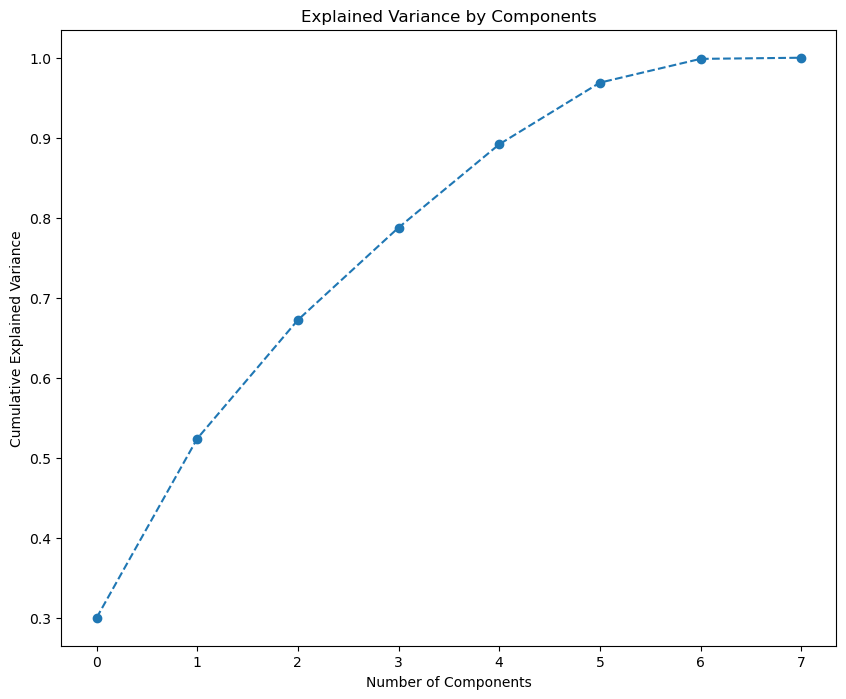

In [39]:
plt.figure(figsize = (10,8))
plt.plot(pca.explained_variance_ratio_.cumsum(),marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

Over 80% of the variance is preserved with 4 components - therefore we will keep 4 components.

In [40]:
pca = PCA(n_components = 4)

In [41]:
pca.fit(df)

PCA(n_components=4)

In [42]:
pca.transform(df)

array([[  24.96488995,  -35.23065551,    1.04582664,   -3.63431576],
       [  45.04869737,  -34.87332877,    1.28509714,   -3.02556027],
       [-100.259544  ,   55.11885715,    1.26754735,   -7.33465005],
       ...,
       [ -55.28177713,  -33.96410231,   -0.71904663,   -7.47813332],
       [  44.50069304,  -27.1424681 ,   -2.31679001,   -8.23583818],
       [ -30.31316277,  -30.37667541,    5.02318269,   -9.4143816 ]])

In [43]:
scores_pca = pca.transform(df)

### K-means clustering with PCA

### The elbow technique

In [45]:
wcss = []
for i in range (1, 21):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

C:\Users\lydia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lydia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lydia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lydia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lydia\anaconda3\lib\site-packages\sklearn\clust

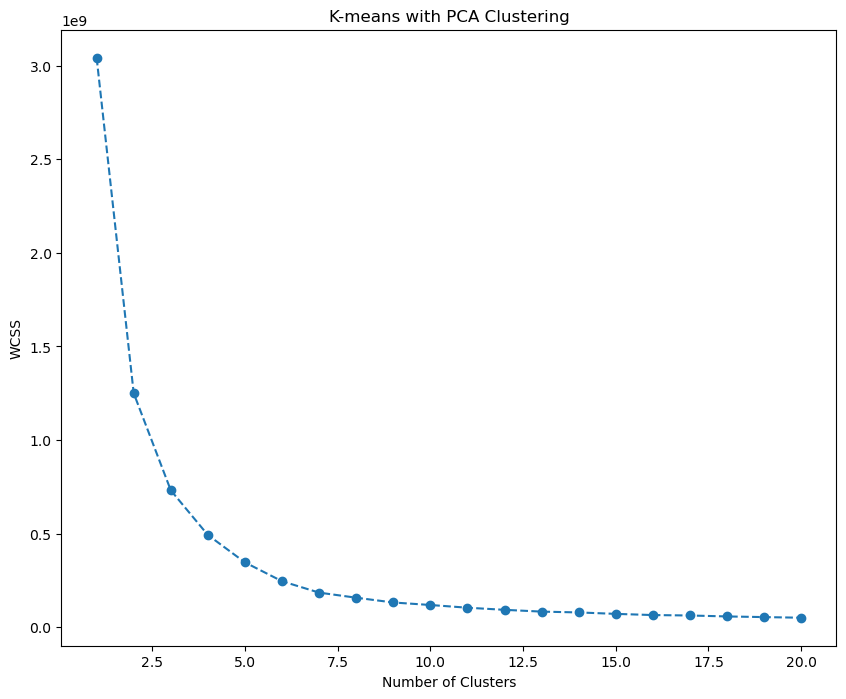

In [46]:
plt.figure(figsize = (10,8))
plt.plot(range(1,21), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

The curve begins to smooth after 4 clusters. Therefore, the optimal number of clusters is 4.

### k-means clustering

In [47]:
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [48]:
kmeans_pca.fit(scores_pca)

C:\Users\lydia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [52]:
df_pca_kmeans = pd.concat([df.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_pca_kmeans.columns.values[-4: ] = ['Component 1', 'Component 2', 'Component 3', 'Component 4']
df_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [53]:
df_pca_kmeans.head()

,injuries,deaths,starting lat,starting lon,ending lat,ending lon,length in miles,width in yards,Component 1,Component 2,Component 3,Component 4,Segment K-means PCA
0,3,0,39,-89,39,-89,3,130,24.964890,-35.230656,1.045827,-3.634316,1
1,3,0,38,-90,38,-90,9,150,45.048697,-34.873329,1.285097,-3.025560,1
2,1,0,40,-84,0,0,0,10,-100.259544,55.118857,1.267547,-7.334650,1
3,1,1,34,-94,0,0,0,17,-93.290806,55.456421,1.069785,1.872046,1
4,0,0,41,-87,0,0,0,100,-10.445628,60.095400,-1.409374,-3.991973,1


In [56]:
df_pca_kmeans['Segment'] = df_pca_kmeans['Segment K-means PCA'].map({0:'first', 1: 'second', 2: 'third', 3: 'fourth'})

In [58]:
df_pca_kmeans.head()

,injuries,deaths,starting lat,starting lon,ending lat,ending lon,length in miles,width in yards,Component 1,Component 2,Component 3,Component 4,Segment K-means PCA,Segment
0,3,0,39,-89,39,-89,3,130,24.964890,-35.230656,1.045827,-3.634316,1,second
1,3,0,38,-90,38,-90,9,150,45.048697,-34.873329,1.285097,-3.025560,1,second
2,1,0,40,-84,0,0,0,10,-100.259544,55.118857,1.267547,-7.334650,1,second
3,1,1,34,-94,0,0,0,17,-93.290806,55.456421,1.069785,1.872046,1,second
4,0,0,41,-87,0,0,0,100,-10.445628,60.095400,-1.409374,-3.991973,1,second


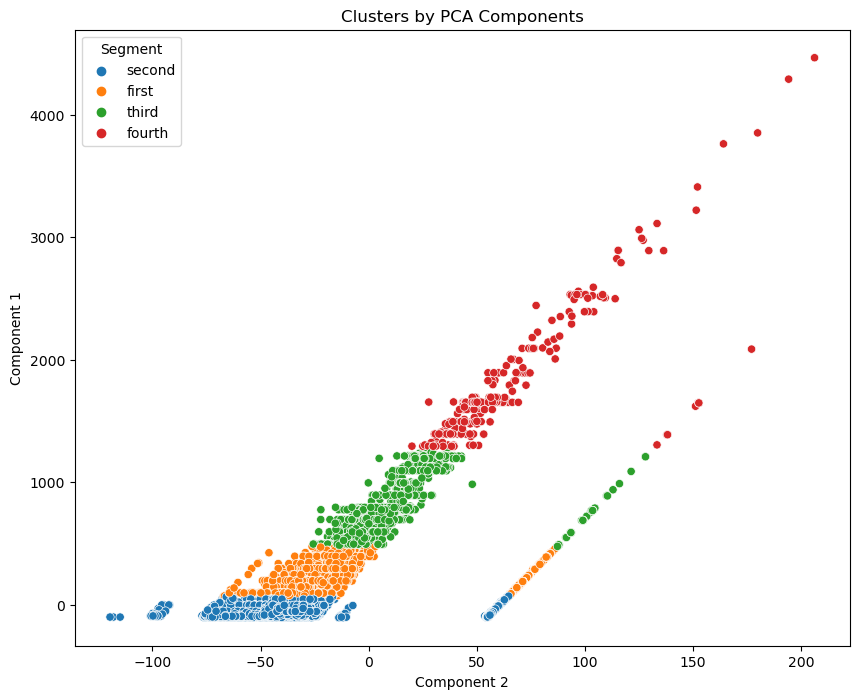

In [59]:
# Plot data by PCA components. The Y axis is the first component, X axis is the second
plt.figure(figsize = (10,8))
ax = sns.scatterplot(x=df_pca_kmeans['Component 2'], y=df_pca_kmeans['Component 1'], hue=df_pca_kmeans['Segment'])
plt.title('Clusters by PCA Components')
plt.show()

### Visualising clusters

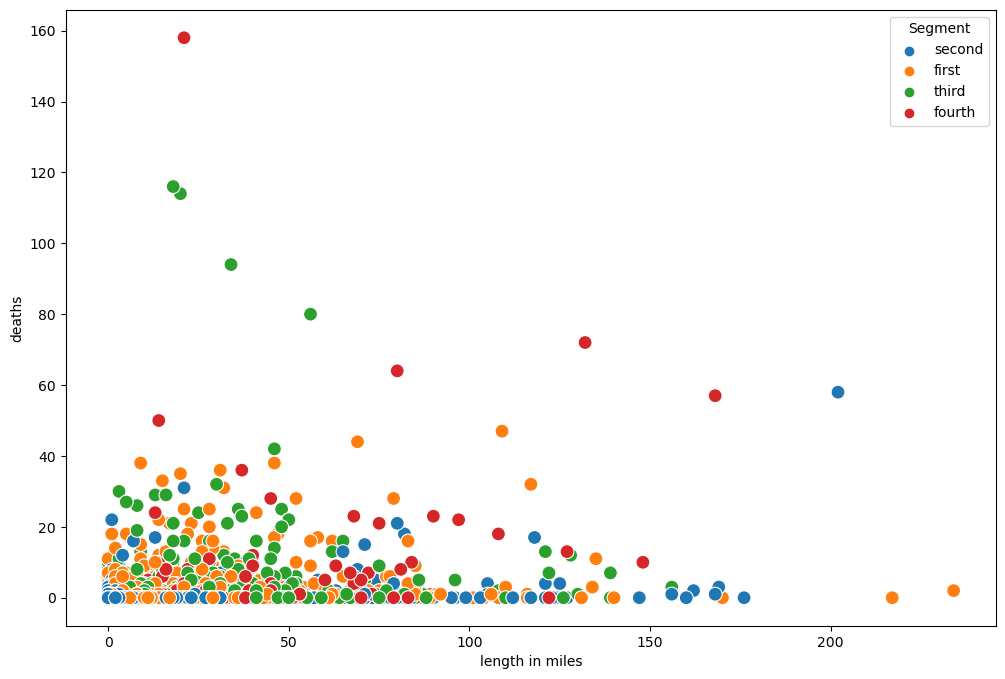

In [60]:
# Plot the clusters for the "length in miles" and "deaths" variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['length in miles'], y=df['deaths'], hue=df_pca_kmeans['Segment'], s=100) 

ax.grid(False)
plt.xlabel('length in miles') 
plt.ylabel('deaths')
plt.show()

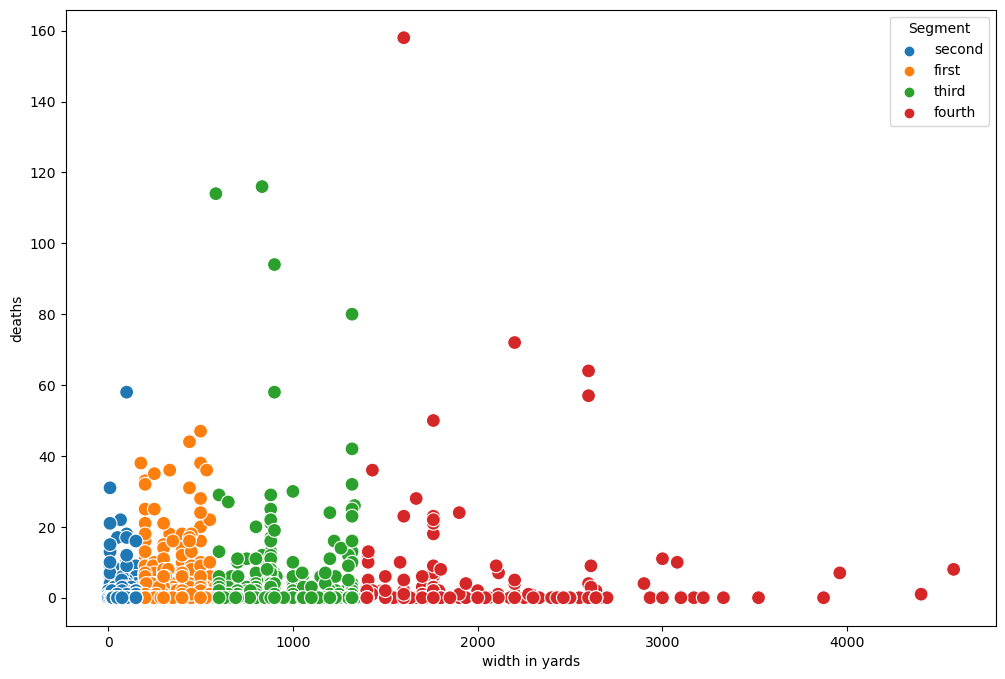

In [61]:
# Plot the clusters for the "width in yards" and "deaths" variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['width in yards'], y=df['deaths'], hue=df_pca_kmeans['Segment'], s=100) 

ax.grid(False)
plt.xlabel('width in yards') 
plt.ylabel('deaths')
plt.show()

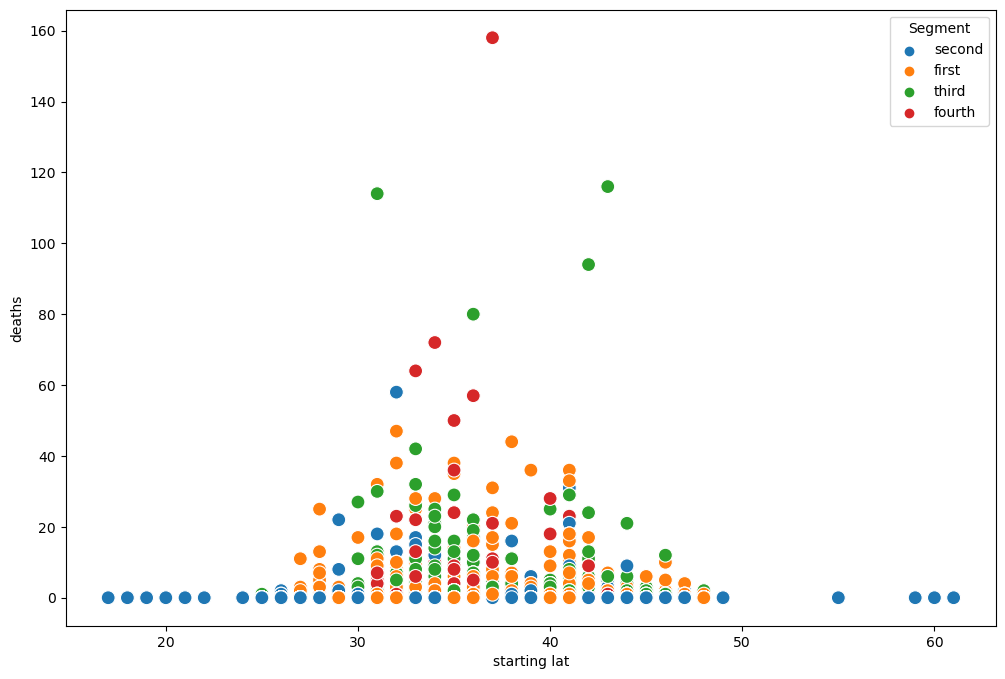

In [62]:
# Plot the clusters for the "starting lat" and "deaths" variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['starting lat'], y=df['deaths'], hue=df_pca_kmeans['Segment'], s=100) 

ax.grid(False)
plt.xlabel('starting lat') 
plt.ylabel('deaths')
plt.show()

In [64]:
df_pca_kmeans.groupby('Segment').agg({'injuries': ['mean','median'],
                          'deaths': ['mean', 'median'],
                          'starting lat': ['mean', 'median'],
                          'length in miles': ['mean', 'median'],
                          'width in yards': ['mean', 'median']})

injuries           deaths        starting lat         \
              mean median      mean median         mean median   
Segment                                                          
first     4.231537    0.0  0.264975    0.0    36.334015   36.0   
fourth   32.854037    1.0  2.739130    0.0    36.158385   35.0   
second    0.479821    0.0  0.021149    0.0    36.718401   37.0   
third    13.673839    0.0  1.035108    0.0    36.006795   35.0   

        length in miles        width in yards          
                   mean median           mean  median  
Segment                                                
first          7.728049    4.0     301.323310   300.0  
fourth        23.425466   15.0    1872.263975  1760.0  
second         2.104597    0.0      45.016545    30.0  
third         14.233296    9.0     861.990374   880.0